# Mon script

## 0. Imports

In [2]:
!pip install --quiet -r requirements_Python.txt

In [13]:
# Import des librairies

import cartiflette.s3
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import pyarrow.parquet as pq
from pyarrow import csv, fs

In [14]:
s3 = fs.S3FileSystem(endpoint_override='https://'+'minio.lab.sspcloud.fr')
bucket = "projet-funathon"
path_data = "2023/sujet3/diffusion"

In [15]:
with s3.open_input_file(f"{bucket}/{path_data}/description-indiv.csv") as file:
    description_indiv = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()

with s3.open_input_file(f"{bucket}/{path_data}/habitudes-indiv.csv") as file:
    habitudes_indiv = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()

with s3.open_input_file(f"{bucket}/{path_data}/actphys-sedent.csv") as file:
    actphys_sedent = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()

with s3.open_input_file(f"{bucket}/{path_data}/fpq.csv") as file:
    fpq = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()


# Pour la partie 3
df = pd.read_parquet(f'{bucket}/{path_data}/description_individu_inca.parquet', filesystem=s3).infer_objects()

## 1. Statistiques univariées avec la table description_indiv

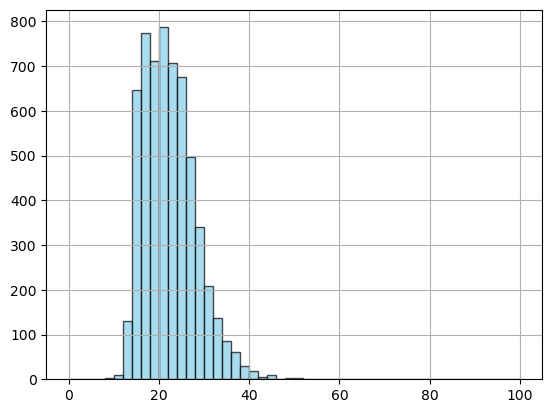

In [26]:
# Histogramme des IMC

description_indiv["imc"].hist(
    bins=50,  # Nombre de barres de l'histogramme
    range=(0, 100),  # Plage des valeurs affichées sur l'axe x
    color='skyblue',  # Couleur des barres de l'histogramme
    edgecolor='black',  # Couleur des bords des barres
    alpha=0.7  # Transparence des barres
)

plt.show()

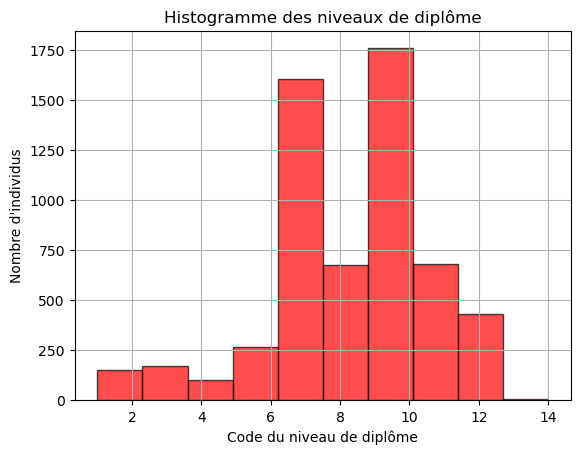

In [32]:
# Histogramme des niveaux de diplôme

description_indiv["diplome_interv"].hist(
    color="red",
    edgecolor="black",
    alpha=0.7
)


# Cette fois on ajoute une légende et un titre
plt.title("Histogramme des niveaux de diplôme")
plt.xlabel("Code du niveau de diplôme")
plt.ylabel("Nombre d'individus")
plt.show()

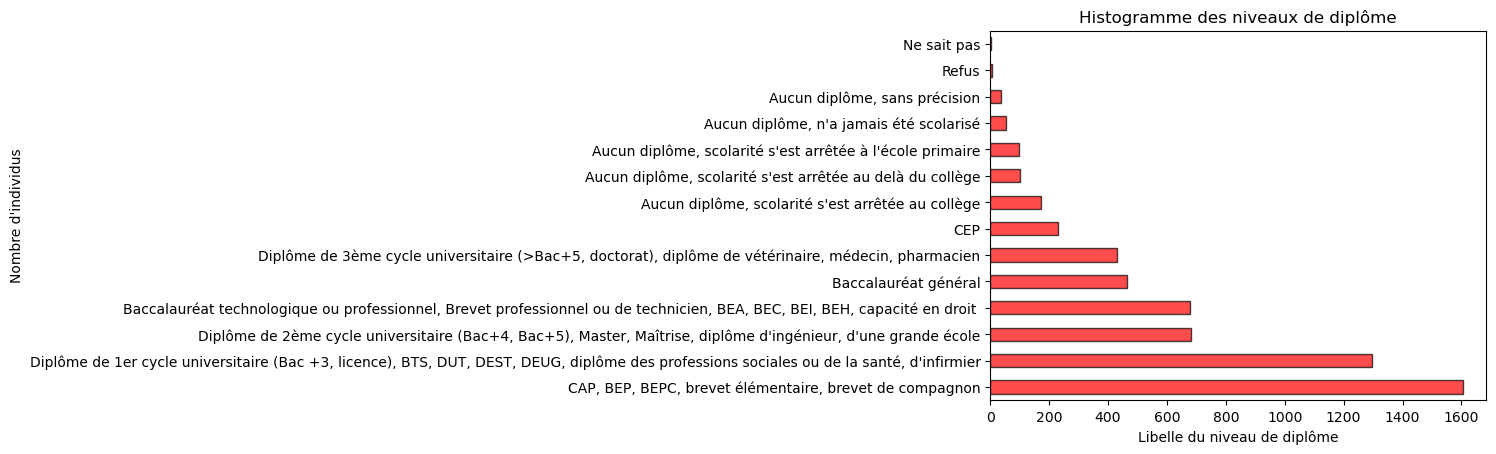

In [34]:
# Tableau des fréquences de chaque catégorie de diplome

# Recodage des niveaux de diplôme
dico_libelle_diplome = {1: "Aucun diplôme, n'a jamais été scolarisé", 
                        2: "Aucun diplôme, scolarité s'est arrêtée à l'école primaire", 
                        3: "Aucun diplôme, scolarité s'est arrêtée au collège",
                       4:"Aucun diplôme, scolarité s'est arrêtée au delà du collège",
                       5:"Aucun diplôme, sans précision",
                       6:"CEP",
                       7:"CAP, BEP, BEPC, brevet élémentaire, brevet de compagnon",
                       8:"Baccalauréat technologique ou professionnel, Brevet professionnel ou de technicien, BEA, BEC, BEI, BEH, capacité en droit ",
                       9:"Baccalauréat général",
                       10:"Diplôme de 1er cycle universitaire (Bac +3, licence), BTS, DUT, DEST, DEUG, diplôme des professions sociales ou de la santé, d'infirmier",
                       11:"Diplôme de 2ème cycle universitaire (Bac+4, Bac+5), Master, Maîtrise, diplôme d'ingénieur, d'une grande école",
                       12:"Diplôme de 3ème cycle universitaire (>Bac+5, doctorat), diplôme de vétérinaire, médecin, pharmacien",
                       13:"Refus",
                       14:"Ne sait pas"}

description_indiv['categorie_diplome'] = description_indiv['diplome_interv'].replace(dico_libelle_diplome)

counts_diplome = description_indiv['categorie_diplome'].value_counts()

# Graphique en barres horizontales
counts_diplome.plot(kind='barh',
                   color="red",
                   edgecolor="black",
                   alpha=0.7)


plt.title("Histogramme des niveaux de diplôme")
plt.xlabel("Libelle du niveau de diplôme")
plt.ylabel("Nombre d'individus")
plt.show()

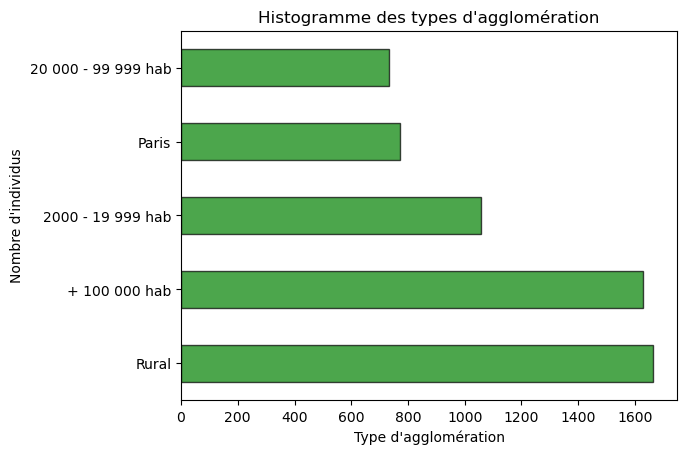

In [35]:
# Histogramme type d'agglomération

dico_libelle_agglo = {1:"Rural",
                     2:"2000 - 19 999 hab",
                     3:"20 000 - 99 999 hab",
                     4:"+ 100 000 hab",
                     5:"Paris"}

description_indiv['categorie_agglo'] = description_indiv['agglo_5cl'].replace(dico_libelle_agglo)

counts_agglo = description_indiv['categorie_agglo'].value_counts()

# Générer le graphique en barres horizontales
counts_agglo.plot(kind='barh',
                   color="green",
                   edgecolor="black",
                   alpha=0.7)


plt.title("Histogramme des types d'agglomération")
plt.xlabel("Type d'agglomération")
plt.ylabel("Nombre d'individus")
plt.show()

In [52]:
# Niveau de vie
description_indiv['RUC_4cl'].describe()

count    5397.000000
mean        2.493978
std         1.117707
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: RUC_4cl, dtype: float64

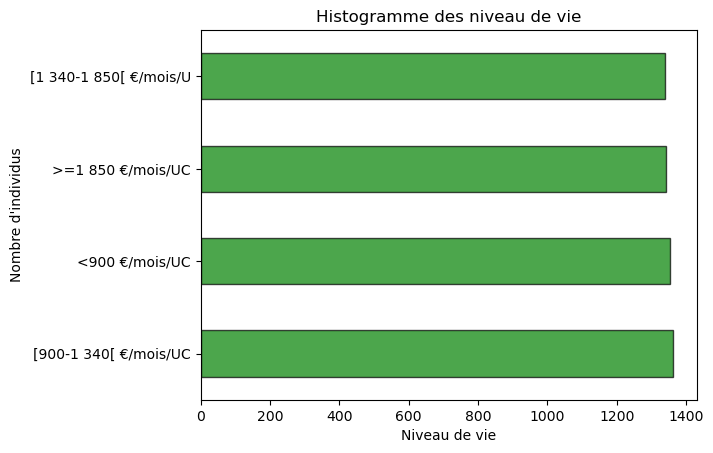

In [53]:
# Niveau de vie
dico_RUC = {1:"<900 €/mois/UC",
            2:"[900-1 340[ €/mois/UC",
            3:"[1 340-1 850[ €/mois/U",
            4:">=1 850 €/mois/UC"}

description_indiv['categorie_revenu'] = description_indiv['RUC_4cl'].replace(dico_RUC)

counts_revenu = description_indiv['categorie_revenu'].value_counts()

# Générer le graphique en barres horizontales
counts_revenu.plot(kind='barh',
                   color="green",
                   edgecolor="black",
                   alpha=0.7)


plt.title("Histogramme des niveau de vie")
plt.xlabel("Niveau de vie")
plt.ylabel("Nombre d'individus")
plt.show()

## 2. Statistiques bivariées avec les tables description_indiv et habitudes_indiv

[]

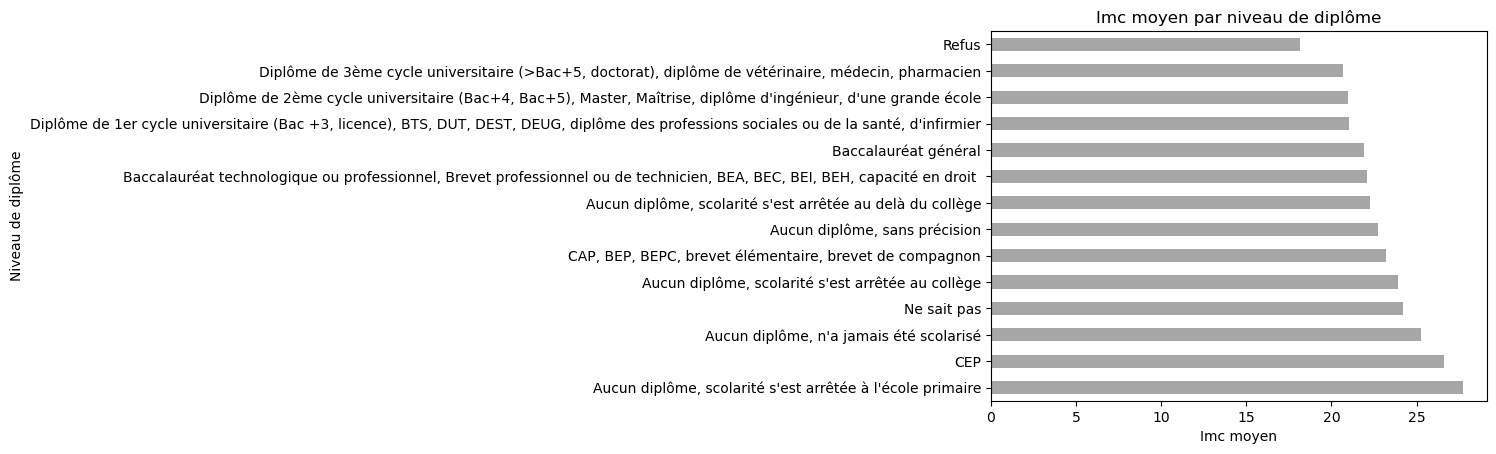

In [54]:
# Imc moyen par niveau de diplôme

imc_par_diplome = description_indiv.groupby('categorie_diplome')['imc'].mean().sort_values(ascending=False)
imc_par_diplome.plot(kind='barh',
                    color="grey",
                    alpha=0.7)

plt.title('Imc moyen par niveau de diplôme')
plt.xlabel('Imc moyen')
plt.ylabel('Niveau de diplôme')
plt.plot()

In [56]:
# Insécurité alimentaire
description_indiv['IA_score'].describe()

count    1003.000000
mean        4.783659
std         2.019266
min         2.860000
25%         2.860000
50%         4.190000
75%         6.300000
max         8.479999
Name: IA_score, dtype: float64

[]

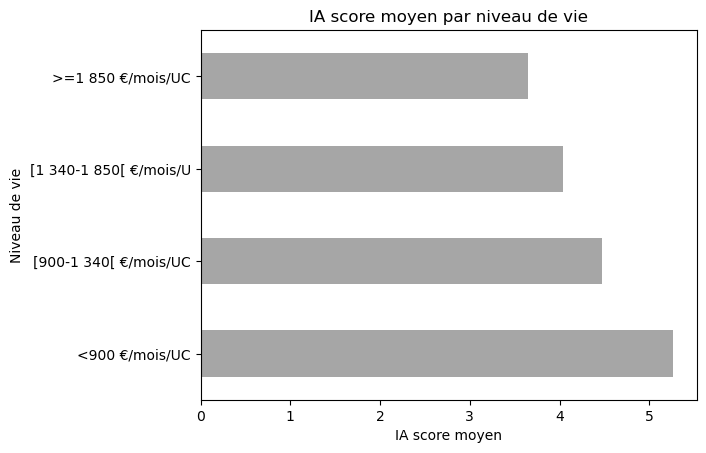

In [58]:
# Niveau moyen d'insécurité alimentaire par niveau de vie

ia_par_revenu = description_indiv.groupby('categorie_revenu')['IA_score'].mean().sort_values(ascending=False)
ia_par_revenu.plot(kind='barh',
                   color="grey",
                   alpha=0.7)

plt.title('IA score moyen par niveau de vie')
plt.xlabel('IA score moyen')
plt.ylabel('Niveau de vie')
plt.plot()

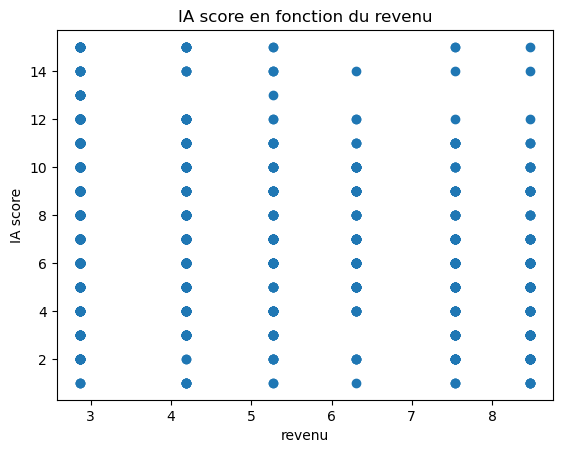

In [60]:
# Créer le graphique
plt.scatter(description_indiv['IA_score'], description_indiv['revenu'])

# Ajouter des étiquettes d'axe
plt.xlabel('revenu')
plt.ylabel('IA score')

# Ajouter un titre
plt.title('IA score en fonction du revenu')

# Afficher le graphique
plt.show()

In [69]:
# Matrice de corrélation
df_num = description_indiv.select_dtypes(include=['int', 'float'])
df_num=df_num[["revenu","IA_score","imc","regime_vegetarien","poidsmax","fume"]]
matrice_correlation = df_num.corr()
matrice_correlation

,revenu,IA_score,imc,regime_vegetarien,poidsmax,fume
revenu,1.000000,-0.317425,-0.112382,-0.070980,0.004608,0.163535
IA_score,-0.317425,1.000000,0.045586,0.078681,0.025915,-0.271382
imc,-0.112382,0.045586,1.000000,0.028699,0.724352,-0.124814
regime_vegetarien,-0.070980,0.078681,0.028699,1.000000,-0.028701,-0.064864
poidsmax,0.004608,0.025915,0.724352,-0.028701,1.000000,-0.050183
fume,0.163535,-0.271382,-0.124814,-0.064864,-0.050183,1.000000


<Axes: >

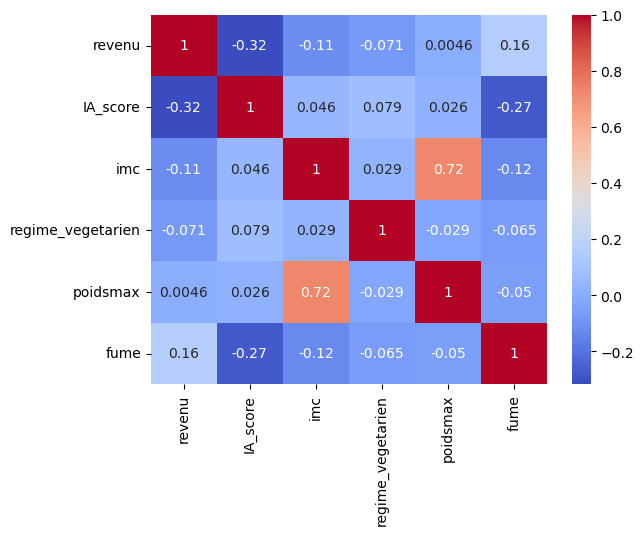

In [70]:
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm')

## 3. Cartographie

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=REGION/crs=4326/FRANCE_ENTIERE=metropole/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 4.76MiB [00:00, 88.7MiB/s]
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


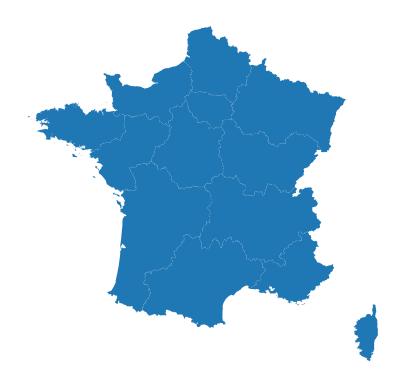

In [71]:
region = cartiflette.s3.download_vectorfile_url_all(
    crs = 4326,
    values = "metropole",
    borders="REGION", # notre unité géographique
    vectorfile_format="topojson",
    filter_by="FRANCE_ENTIERE", # le champ qui nous intéresse
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)
ax = region.plot()
ax.set_axis_off()

In [72]:
region.head()

,id,ID,NOM_M,NOM,INSEE_REG,source,territoire,geometry
0,REGION_FXX_0000000000001,NaN,ILE-DE-FRANCE,Île-de-France,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.94279 49.07828, 2.94294 49.07828, ..."
1,REGION_FXX_0000000000002,NaN,CENTRE-VAL DE LOIRE,Centre-Val de Loire,24,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.34194 48.31617, 2.34224 48.31617, ..."
2,REGION_FXX_0000000000003,NaN,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté,27,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((7.01658 47.64695, 7.01644 47.64695, ..."
3,REGION_FXX_0000000000004,NaN,NORMANDIE,Normandie,28,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((-1.51177 48.66055, -1.51162 48..."
4,REGION_FXX_0000000000005,NaN,HAUTS-DE-FRANCE,Hauts-de-France,32,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.72418 49.08072, 2.72418 49.08062, ..."


In [86]:
description_x_fpq = pd.merge(description_indiv,fpq,on="NOIND")

# Recodage de la variable région pour avoir les mêmes noms que dans notre fond de carte (qu'on vient de télécharger avec cartiflette)

dico_libelle_region = {1:"ILE-DE-FRANCE",
                      2:"NORMANDIE",
                      3:"CENTRE-VAL DE LOIRE",
                      4:"PAYS DE LA LOIRE",
                      5:"BRETAGNE",
                      6:"HAUTS-DE-FRANCE",
                      7:"GRAND EST",
                      8:"BOURGOGNE-FRANCHE-COMTE",
                      9:"AUVERGNE-RHONE-ALPES",
                      10:"PROVENCE-ALPES-COTE D'AZUR",
                      11:"OCCITANIE",
                      12:"NOUVELLE-AQUITAINE"}

description_x_fpq["region_recode"]=description_x_fpq['region_adm_12cl'].replace(dico_libelle_region)

# Variable à représenter géographiquement : nombre de bière consommées par mois. 
biere_par_region = description_x_fpq.groupby('region_recode')['BA_biere_freq_M'].mean()
vin_par_region = description_x_fpq.groupby('region_recode')['BA_vin_freq_M'].mean()
print(biere_par_region.sort_values(ascending=False))
print(vin_par_region.sort_values(ascending=False))

region_recode
BRETAGNE                      6.551802
HAUTS-DE-FRANCE               6.303672
GRAND EST                     5.797945
BOURGOGNE-FRANCHE-COMTE       5.630435
NORMANDIE                     5.388889
AUVERGNE-RHONE-ALPES          5.205775
NOUVELLE-AQUITAINE            4.390625
ILE-DE-FRANCE                 4.288275
OCCITANIE                     4.109873
PROVENCE-ALPES-COTE D'AZUR    4.062281
PAYS DE LA LOIRE              3.769676
CENTRE-VAL DE LOIRE           3.404255
Name: BA_biere_freq_M, dtype: float64
region_recode
PROVENCE-ALPES-COTE D'AZUR    8.913218
BOURGOGNE-FRANCHE-COMTE       8.375926
ILE-DE-FRANCE                 8.159251
OCCITANIE                     8.155285
AUVERGNE-RHONE-ALPES          7.949519
BRETAGNE                      7.901282
NORMANDIE                     7.602469
NOUVELLE-AQUITAINE            7.480583
GRAND EST                     7.058464
HAUTS-DE-FRANCE               6.418712
PAYS DE LA LOIRE              6.082456
CENTRE-VAL DE LOIRE           5.23611

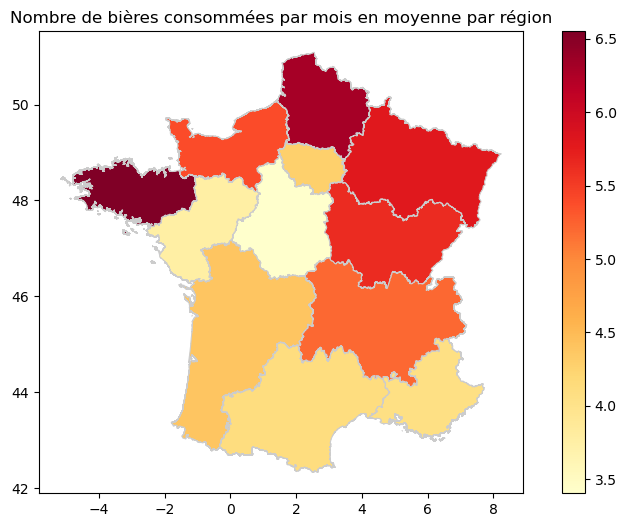

In [87]:
# On crée un petit tableau avec nos régions et leurs attributs géographiques, 
# et surtout la variable qu'on vient de calculer (c'est-à-dire le nombre de bières consommées par mois par région en moyenne)

region_inca=pd.merge(region,biere_par_region,left_on="NOM_M",right_on="region_recode")

# Créez une figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Dessinez la carte choroplèthe
region_inca.plot(column='BA_biere_freq_M', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Ajoutez une légende
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=region_inca['BA_biere_freq_M'].min(), vmax=region_inca['BA_biere_freq_M'].max()))
plt.colorbar(sm, ax=ax)
plt.title("Nombre de bières consommées par mois en moyenne par région")

# Affichez le graphique
plt.show()

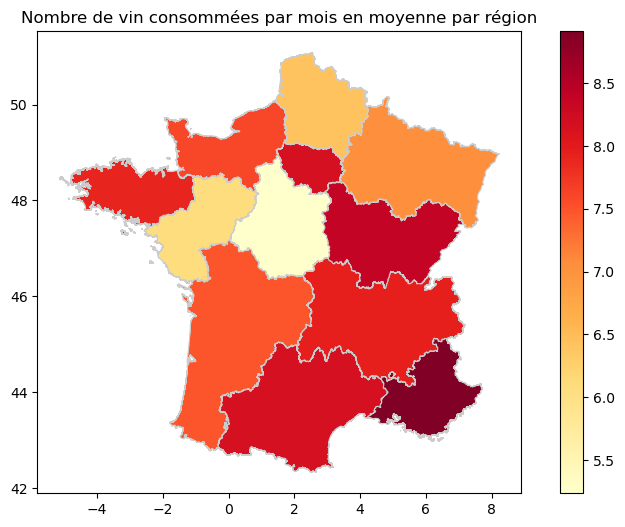

In [88]:
# On crée un petit tableau avec nos régions et leurs attributs géographiques, 
# et surtout la variable qu'on vient de calculer (c'est-à-dire le nombre de bières consommées par mois par région en moyenne)

region_inca=pd.merge(region,vin_par_region,left_on="NOM_M",right_on="region_recode")

# Créez une figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Dessinez la carte choroplèthe
region_inca.plot(column='BA_vin_freq_M', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Ajoutez une légende
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=region_inca['BA_vin_freq_M'].min(), vmax=region_inca['BA_vin_freq_M'].max()))
plt.colorbar(sm, ax=ax)
plt.title("Nombre de vin consommées par mois en moyenne par région")

# Affichez le graphique
plt.show()

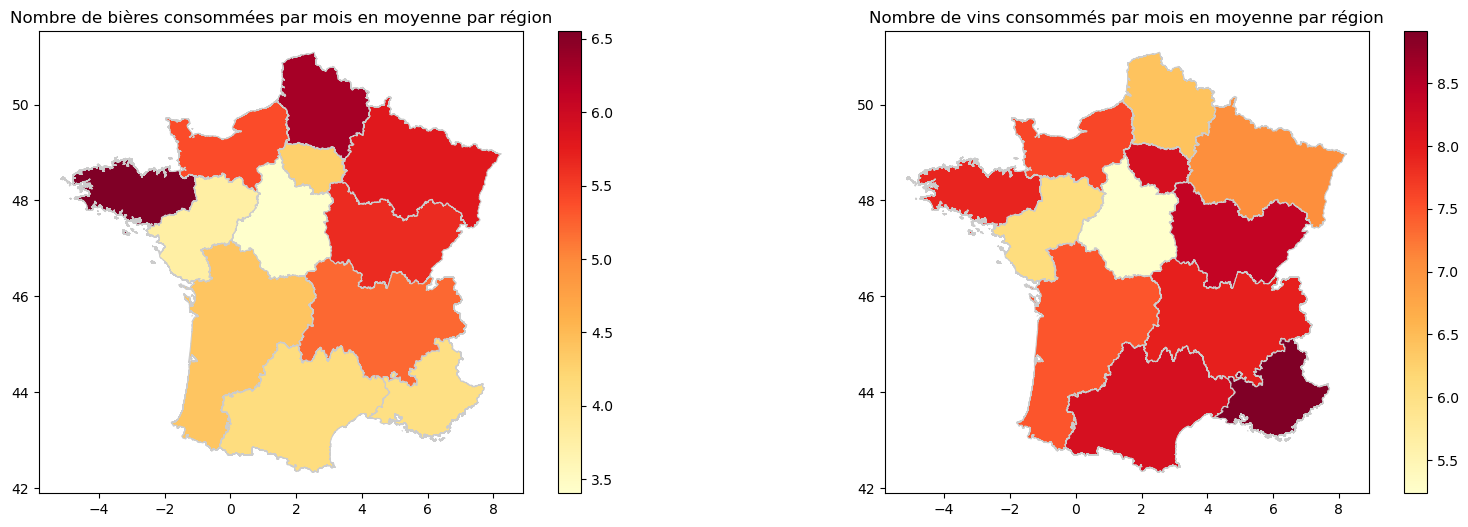

In [92]:
# Première carte - bières consommées par mois par région
region_inca = pd.merge(region, biere_par_region, left_on="NOM_M", right_on="region_recode")

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Première carte - bières consommées
ax1 = axes[0]
region_inca.plot(column='BA_biere_freq_M', cmap='YlOrRd', linewidth=0.8, ax=ax1, edgecolor='0.8')
sm1 = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=region_inca['BA_biere_freq_M'].min(), vmax=region_inca['BA_biere_freq_M'].max()))
plt.colorbar(sm1, ax=ax1)
ax1.set_title("Nombre de bières consommées par mois en moyenne par région")

# Deuxième carte - vins consommés par mois par région
region_inca = pd.merge(region, vin_par_region, left_on="NOM_M", right_on="region_recode")

# Deuxième carte - vins consommés
ax2 = axes[1]
region_inca.plot(column='BA_vin_freq_M', cmap='YlOrRd', linewidth=0.8, ax=ax2, edgecolor='0.8')
sm2 = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=region_inca['BA_vin_freq_M'].min(), vmax=region_inca['BA_vin_freq_M'].max()))
plt.colorbar(sm2, ax=ax2)
ax2.set_title("Nombre de vins consommés par mois en moyenne par région")

# Affichage des cartes
plt.show()

## 4. Clustering d'individus

In [155]:
habitudes_indiv.shape

(4372, 389)

In [156]:
habitudes_indiv.head(5)

,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_plusvt_li_autr_anim_libelle,lait_plusvt_pi_autre_veg_libelle,lait_plusvt_boisson_veg_libelle,lait_plusvt_autre_anim_libelle,lait_plusvt_autre_libelle,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li_autre_anim_libelle,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_pi_autre_veg_libelle,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_boisson_veg_libelle,lait_occ_autre_anim,lait_occ_autre_anim_libelle,lait_occ_autre,lait_occ_autre_libelle,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,lieu_repas_midi_autre_libelle,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_autre_raison_libelle,cantine_jms_nsp,collation_freq,collation_aliment1,collation_aliment2,collation_aliment3,collation_aliment4,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,collation_matin_aliment1,collation_matin_aliment2,collation_matin_aliment3,collation_matin_aliment4,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_autre_libelle,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,source_autre_libelle,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,sterilisation_bib_libelle,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,sterilisation_tetine_libelle,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,bib_autre_libelle,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,conserv_eau,conserv_eau_libelle,

### selection variables

In [157]:
# Sélectionner les caractéristiques pour le clustering

habitudes_indiv_clustering_1 = habitudes_indiv.drop(
    ['POPULATION', 'NOIND', 'periode_reference'],  # Identifiants
    axis=1
).dropna(
    axis=1, how='all'  # Colonnes vides
).select_dtypes(
    include=np.number  # Colonnes numériques à garder
)

habitudes_indiv_clustering_1 = habitudes_indiv_clustering_1.loc[
    :, habitudes_indiv_clustering_1.nunique() > 1
]  # On retire les colonnes avec moins de 2 valeurs distinctes

print(habitudes_indiv_clustering_1.shape)
habitudes_indiv_clustering_1.head(5)

(4372, 335)


,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_autre_anim,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_nsp,collation_freq,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,reste_eau,conso_apres_prepa_bib_li,tps_conserv_bib_li,lieu_conserv_bib_li,tps_conso_bib_li,chauffe_lm,chauffe_pi,chauffe_lc,chauffe_bl,bib_micro_ondes,bib_chauffe_bib,bib_bainmarie,diversification_alim_bebe,prepbb,prepbb_chauff,prepbb_chauff_coupplastique,prepbb_chauff_potverre,prepbb_chauff_recipopaque,prepbb_chauff_reciptranslucid,prepbb_chauff_recipceramique,prepbb_chauff_recipverre,conso_farine_ssgluten,conso_farine_ssgluten_age,conso_farine_ssgluten_age_nsp,conso_farine_acgluten,conso_farine_acgluten_age,conso_farine_acgluten_age_nsp,conso_cereales,conso_cereales_age,conso_cereales_age_nsp,conso_legumes_horspdt,conso_legumes_horspdt_age,conso_legumes_horspdt_age_nsp,conso_pdt,conso_pdt_age,conso_pdt_age_nsp,conso_riz_pates,conso_riz_pates_age,conso_riz_

### imputations

In [165]:
from sklearn.impute import SimpleImputer

# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
habitudes_indiv_clustering_2 = imputer.fit_transform(habitudes_indiv_clustering_1)
habitudes_indiv_clustering_2 = pd.DataFrame(habitudes_indiv_clustering_2, columns=habitudes_indiv_clustering_1.columns)
habitudes_indiv_clustering_2.head()

,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_autre_anim,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_nsp,collation_freq,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,reste_eau,conso_apres_prepa_bib_li,tps_conserv_bib_li,lieu_conserv_bib_li,tps_conso_bib_li,chauffe_lm,chauffe_pi,chauffe_lc,chauffe_bl,bib_micro_ondes,bib_chauffe_bib,bib_bainmarie,diversification_alim_bebe,prepbb,prepbb_chauff,prepbb_chauff_coupplastique,prepbb_chauff_potverre,prepbb_chauff_recipopaque,prepbb_chauff_reciptranslucid,prepbb_chauff_recipceramique,prepbb_chauff_recipverre,conso_farine_ssgluten,conso_farine_ssgluten_age,conso_farine_ssgluten_age_nsp,conso_farine_acgluten,conso_farine_acgluten_age,conso_farine_acgluten_age_nsp,conso_cereales,conso_cereales_age,conso_cereales_age_nsp,conso_legumes_horspdt,conso_legumes_horspdt_age,conso_legumes_horspdt_age_nsp,conso_pdt,conso_pdt_age,conso_pdt_age_nsp,conso_riz_pates,conso_riz_pates_age,conso_riz_

### normalisation

In [167]:
from sklearn.preprocessing import StandardScaler

# Normaliser les colonnes
scaler = StandardScaler()
habitudes_indiv_clustering_3 = scaler.fit_transform(habitudes_indiv_clustering_2)
habitudes_indiv_clustering_3 = pd.DataFrame(habitudes_indiv_clustering_3, columns=habitudes_indiv_clustering_2.columns)
habitudes_indiv_clustering_3.head()

,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_autre_anim,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_nsp,collation_freq,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,reste_eau,conso_apres_prepa_bib_li,tps_conserv_bib_li,lieu_conserv_bib_li,tps_conso_bib_li,chauffe_lm,chauffe_pi,chauffe_lc,chauffe_bl,bib_micro_ondes,bib_chauffe_bib,bib_bainmarie,diversification_alim_bebe,prepbb,prepbb_chauff,prepbb_chauff_coupplastique,prepbb_chauff_potverre,prepbb_chauff_recipopaque,prepbb_chauff_reciptranslucid,prepbb_chauff_recipceramique,prepbb_chauff_recipverre,conso_farine_ssgluten,conso_farine_ssgluten_age,conso_farine_ssgluten_age_nsp,conso_farine_acgluten,conso_farine_acgluten_age,conso_farine_acgluten_age_nsp,conso_cereales,conso_cereales_age,conso_cereales_age_nsp,conso_legumes_horspdt,conso_legumes_horspdt_age,conso_legumes_horspdt_age_nsp,conso_pdt,conso_pdt_age,conso_pdt_age_nsp,conso_riz_pates,conso_riz_pates_age,conso_riz_

### gestion outliers

In [169]:
from sklearn.ensemble import IsolationForest

# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(habitudes_indiv_clustering_3)
habitudes_indiv_clustering_4 = habitudes_indiv_clustering_3[outlier_labels == 1]

habitudes_indiv_clustering_4.shape

/opt/mamba/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(4153, 335)

In [184]:
habitudes_indiv_clustering = habitudes_indiv_clustering_4

### K-means

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

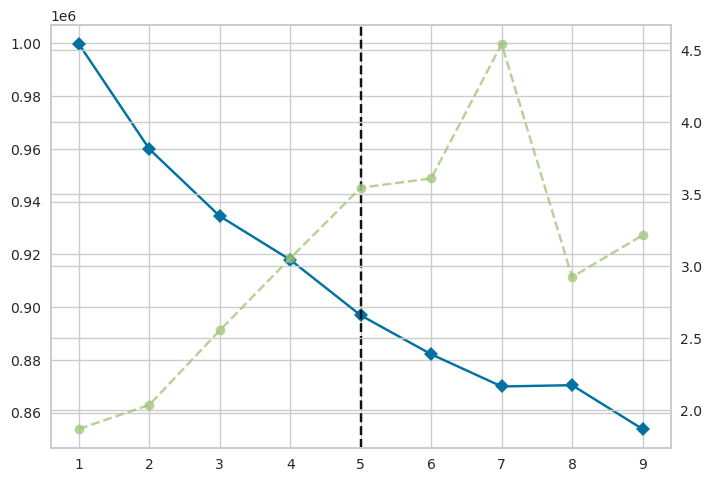

In [171]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_method = KElbowVisualizer(KMeans(), k=(1,10))
elbow_method.fit(habitudes_indiv_clustering)


In [185]:
k_kmeans = 3
kmeans = KMeans(n_clusters=k_kmeans, random_state=0)
clusters_kmeans = kmeans.fit_predict(habitudes_indiv_clustering)

/opt/mamba/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [186]:
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [187]:
from scipy.cluster.hierarchy import linkage

# Utiliser la méthode linkage pour effectuer le clustering hiérarchique
regroupements = linkage(habitudes_indiv_clustering, method='ward')

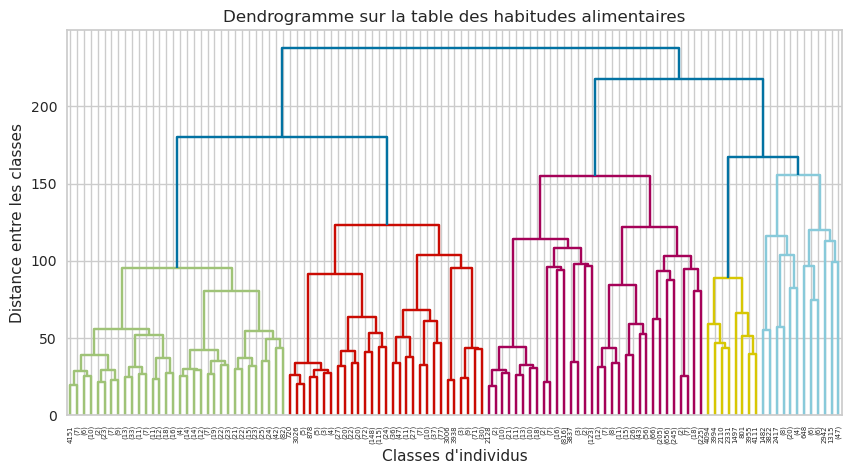

In [188]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

profondeur_a_afficher = 6

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(regroupements,
           truncate_mode='level',
           p=profondeur_a_afficher)

plt.title("Dendrogramme sur la table des habitudes alimentaires")
plt.xlabel("Classes d'individus")
plt.ylabel("Distance entre les classes")
plt.show()


In [189]:
from scipy.cluster.hierarchy import fcluster

k_cah = 3  # Nombre de clusters souhaité
clusters_cah = fcluster(regroupements, k_cah, criterion='maxclust')


In [191]:
from sklearn.decomposition import PCA

nb_composantes_principales = 3

# Effectuer l'ACP
acp = PCA(n_components=nb_composantes_principales)
projection_individus_array = acp.fit_transform(habitudes_indiv_clustering)
projection_individus = pd.DataFrame(data=projection_individus_array, columns=['PC1', 'PC2', 'PC3'])

# Obtenir les poids des caractéristiques pour chaque composante principale
composantes_principales = pd.DataFrame(acp.components_, columns=habitudes_indiv_clustering.columns)

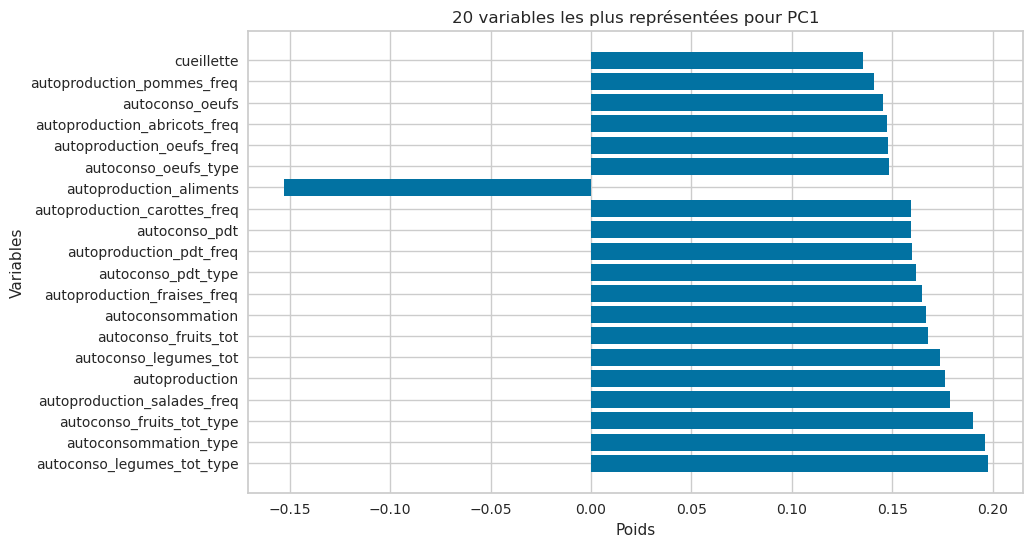

In [193]:
nb_top_features = 20

# Sélectionner les 20 caractéristiques les plus importantes pour PC1
pc1_top_features_abs = composantes_principales.iloc[0].abs().nlargest(nb_top_features, keep='all')
pc1_top_features = composantes_principales.iloc[0].loc[pc1_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title(f'{nb_top_features} variables les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.show()

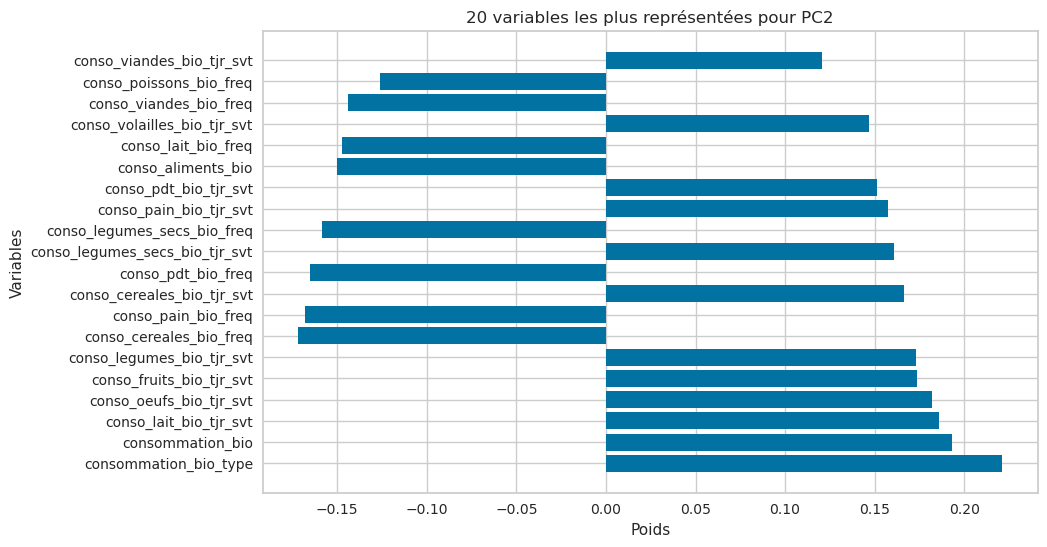

In [194]:
nb_top_features = 20

# Sélectionner les 20 caractéristiques les plus importantes pour PC2
pc2_top_features_abs = composantes_principales.iloc[1].abs().nlargest(nb_top_features, keep='all')
pc2_top_features = composantes_principales.iloc[1].loc[pc2_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title(f'{nb_top_features} variables les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.show()

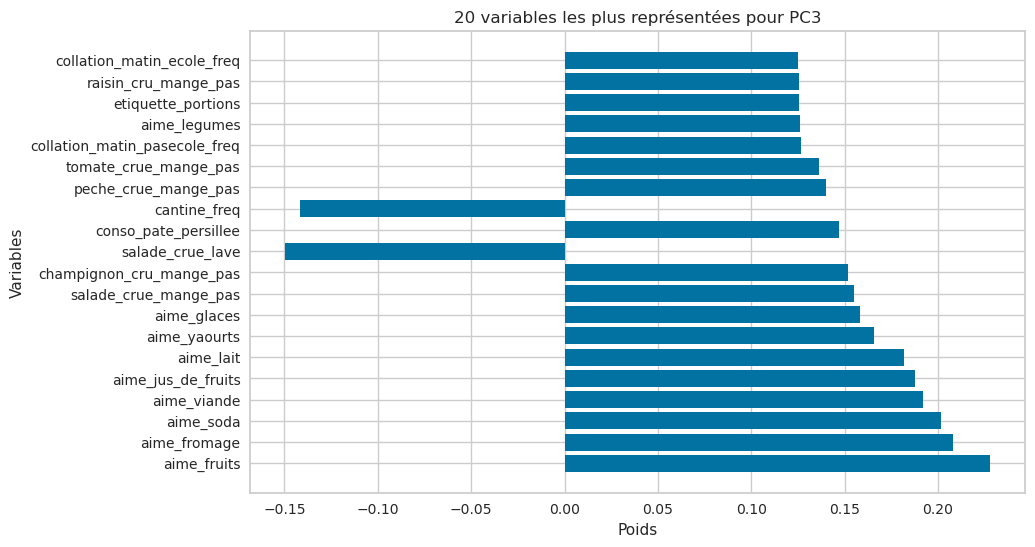

In [195]:
nb_top_features = 20

# Sélectionner les 20 caractéristiques les plus importantes pour PC3
pc3_top_features_abs = composantes_principales.iloc[2].abs().nlargest(nb_top_features, keep='all')
pc3_top_features = composantes_principales.iloc[2].loc[pc3_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC3
plt.figure(figsize=(10, 6))
plt.barh(pc3_top_features.index, pc3_top_features.values)
plt.title(f'{nb_top_features} variables les plus représentées pour PC3')
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.show()

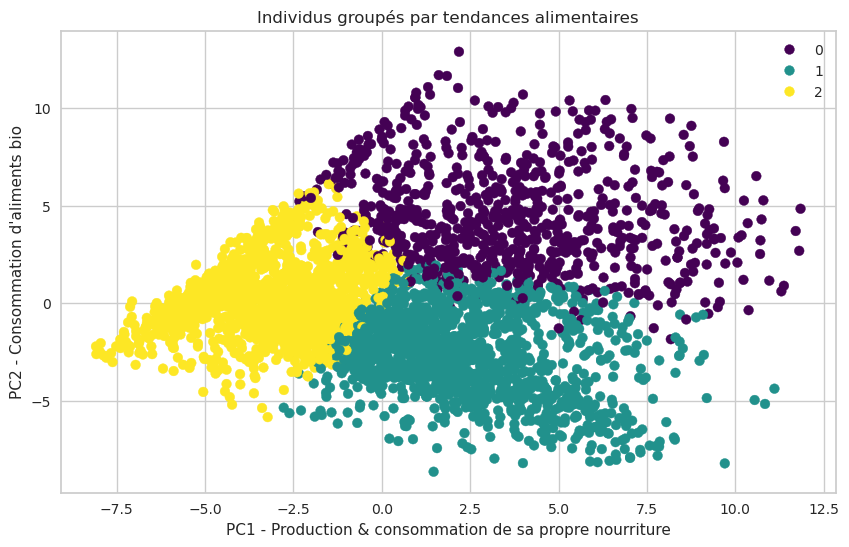

In [199]:
projection_individus_et_clusters = projection_individus.copy()
projection_individus_et_clusters['cluster_kmeans'] = clusters_kmeans
projection_individus_et_clusters['cluster_cah'] = clusters_cah

# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(
    projection_individus_et_clusters['PC1'],
    projection_individus_et_clusters['PC2'],
    c=projection_individus_et_clusters['cluster_kmeans'],
    cmap='viridis'
)

plt.legend(handles=scatter_plot.legend_elements()[0], labels=range(k_kmeans))
plt.title('Individus groupés par tendances alimentaires')
plt.xlabel('PC1 - Production & consommation de sa propre nourriture')
plt.ylabel('PC2 - Consommation d\'aliments bio')

plt.show()


count    4153.000000
mean        1.690585
std         0.514108
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: cluster_cah, dtype: float64

## ML supervisé

In [200]:
df.shape

(5841, 118)

In [201]:
df.head()

,NOIND,imc,sex_PS,tage_PS,tage_PS_mois,diplome_interv,etude_4cl_interv,situ_prof_5cl_interv,atrav_interv,trav_nuit_interv,trav_nuit_2cl_interv,PCS_8cl_interv,PCS_4cl_interv,tps_travail_interv,vacances_interv,soins,situ_fin_3cl,revenu,RUC_4cl,nbpers,nbadu,nbenf,situ_alim_statut,IA_statut,IA_score,statnut,maladie_allergie_alim,intoall_confirm_med,regime_vegetarien,regime_allergie,regime_maigrir_med,regime_maigrir_choix,regime_autre_med,regime_poidsstable,regime_forme,regime_autreraison,regime_non,veget_viande,veget_prodmer,veget_prodlait,veget_oeuf,veget_miel,veget_autre_alim,allergie_laitvache,allergie_prepainfsoja,allergie_prepainfamande,allergie_gluten,allergie_farineble,allergie_lupin,allergie_arachide,allergie_fruitcoque,allergie_oeuf,allergie_poisson,allergie_crustace,allergie_mollusque,allergie_soja,allergie_sesame,allergie_moutarde,allergie_sulfite,allergie_celeri,allergie_autres_fruitleg,allergie_autresalim,allergie_nondetermine,allergie_fruits,allergie_legumes,regime_passe,regime_nb_2dernann,regime_nb_anter2dernann,regime_type,regime_duree_sem,regime_duree_mois,regime_duree_nsp,poids_modif,poids_modifalim,poids_plusAP,poids_medicaments,poids_substituts,poids_chirurgie,poids_modifalim_laityaourt,poids_modifalim_fromage,poids_modifalim_mg,poids_modifalim_fruit,poids_modifalim_legume,poids_modifalim_pdtfeculent,poids_modifalim_pizza,poids_modifalim_pain,poids_modifalim_vrouge,poids_modifalim_volaille,poids_modifalim_oeuf,poids_modifalim_gateau,poids_modifalim_edulcorant,poids_modifalim_pdtsalleges,poids_modifalim_BS,poids_modifalim_eau,poids_modifalim_autre,poids_perception,nb_prise_10kg,menopause,enceinte,enceinte_nbmois,allaite,allaite_nbsem,enceinte_12dermois,fume,nb_cigarettes_jour,nb_cigarettes_sem,nb_cigarettes_nsp,nb_cigares_jour,nb_cigares_sem,nb_cigares_nsp,nb_pipes_jour,nb_pipes_sem,nb_pipes_nsp,fume_age_debut,fume_age_debut_nsp,fume_age_arret,fume_age_arret_nsp,bmr_kcal
0,110100101,18.282312,1,7,NaN,7.0,1,3,2.0,NaN,NaN,8,4,NaN,2,2,2,12,3.0,4,3,1,1,0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1378.0930
1,110100701,23.624619,2,8,NaN,7.0,1,1,NaN,4.0,2.0,1,1,2.0,1,2,1,11,4.0,2,2,0,1,0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.7802
2,110100801,29.949701,1,8,NaN,7.0,1,1,NaN,4.0,2.0,2,1,1.0,1,2,1,11,2.0,4,2,2,1,0,NaN,3.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,15.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,25.0,NaN,33.0,NaN,1630.9735
3,110101201,26.141914,1,8,NaN,10.0,3,1,NaN,4.0,2.0,1,1,1.0,1,2,1,11,4.0,1,1,0,1,0,NaN,3.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.4603
4,110101401,22.420361,2,9,NaN,7.0,1,4,1.0,NaN,NaN,7,4,1.0,1,2,2,6,1.0,2,2,0,1,0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [202]:
TARGET_VARIABLE="imc"
INDEX="NOIND"
SEED=2023

In [203]:
NUMERICAL = [
    "IA_score",
    "bmr_kcal",
    'nbenf',
    "enceinte_nbmois",
    'nb_cigarettes_jour',
    'nb_cigarettes_sem',
    'nb_cigares_jour',
    'nb_cigares_sem',
    'nb_pipes_jour',
    'nb_pipes_sem',
    'fume_age_debut',
    'fume_age_arret',
    'allaite_nbsem',
    "regime_nb_2dernann",
    "regime_nb_anter2dernann"
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL

In [205]:
from sklearn.model_selection import train_test_split

X = df[FEATURES]
y = df[TARGET_VARIABLE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [206]:
CATEGORICAL_REGRESSION = [
    "sex_PS",
    "tage_PS",
    "revenu",
    "situ_alim_statut",
    "poids_perception" ,
    "enceinte",
]

NUMERICAL_REGRESSION = [
    "IA_score",
    "enceinte_nbmois",
    "nb_prise_10kg"
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION

In [207]:
X_train_regression = X_train[FEATURES_REGRESSION]
X_test_regression = X_test[FEATURES_REGRESSION]

In [208]:
X_train_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4672 entries, 4763 to 4962
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IA_score          781 non-null    float64
 1   enceinte_nbmois   14 non-null     float64
 2   nb_prise_10kg     1699 non-null   float64
 3   sex_PS            4672 non-null   int64  
 4   tage_PS           4672 non-null   int64  
 5   revenu            4672 non-null   int64  
 6   situ_alim_statut  4672 non-null   int64  
 7   poids_perception  2572 non-null   float64
 8   enceinte          666 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 365.0 KB


In [210]:
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

In [211]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer, StandardScaler())

In [212]:
from sklearn.compose import ColumnTransformer

preprocessor_regression = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, ["enceinte_nbmois", "nb_prise_10kg"]),
        ("numerical_median", numerical_median, [x for x in NUMERICAL_REGRESSION if x not in  ["enceinte_nbmois", "nb_prise_10kg"]]),
        ("categorical", categorical_encoder, CATEGORICAL_REGRESSION)
    ]
)

In [213]:
X_train_regression.head(10)

,IA_score,enceinte_nbmois,nb_prise_10kg,sex_PS,tage_PS,revenu,situ_alim_statut,poids_perception,enceinte
4763,NaN,NaN,NaN,2,9,15,1,NaN,NaN
4655,2.86,NaN,NaN,1,7,5,2,NaN,NaN
3429,NaN,NaN,NaN,1,6,15,1,NaN,NaN
3965,2.86,NaN,2.0,2,8,7,1,2.0,2.0
4442,NaN,NaN,NaN,1,4,12,1,NaN,NaN
3923,NaN,NaN,3.0,1,7,11,1,3.0,NaN
1065,NaN,NaN,NaN,2,4,13,1,NaN,NaN
3670,NaN,NaN,4.0,2,7,7,2,1.0,2.0
808,NaN,NaN,NaN,1,6,10,2,1.0,NaN
2077,NaN,NaN,NaN,2,5,5,1,1.0,NaN


In [214]:
preprocessor_regression.fit(X_train_regression)

ColumnTransformer(transformers=[('numerical_zero',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['enceinte_nbmois', 'nb_prise_10kg']),
                                ('numerical_median',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['IA_score']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['sex_PS', 'tage_PS', 'revenu',
                                  'situ_alim_statut', 'poids_perception',
                                  'enceinte'])])

In [215]:
preprocessor_regression.get_feature_names_out()

array(['numerical_zero__enceinte_nbmois', 'numerical_zero__nb_prise_10kg',
       'numerical_median__IA_score', 'categorical__sex_PS',
       'categorical__tage_PS', 'categorical__revenu',
       'categorical__situ_alim_statut', 'categorical__poids_perception',
       'categorical__enceinte'], dtype=object)

In [216]:
import re

original_feature_names = [re.sub(r'^.*__', '', item) for item in preprocessor_regression.get_feature_names_out()]
original_feature_names

['enceinte_nbmois',
 'nb_prise_10kg',
 'IA_score',
 'sex_PS',
 'tage_PS',
 'revenu',
 'situ_alim_statut',
 'poids_perception',
 'enceinte']

In [217]:
data_preprocessed = pd.DataFrame(preprocessor_regression.fit_transform(X_train_regression), columns=original_feature_names)
data_preprocessed.head(10)

,enceinte_nbmois,nb_prise_10kg,IA_score,sex_PS,tage_PS,revenu,situ_alim_statut,poids_perception,enceinte
0,-0.052955,-0.720455,-0.125994,0.952742,1.355361,1.633466,-0.462205,-1.004860,-0.406907
1,-0.052955,-0.720455,-1.635165,-1.049602,0.390153,-1.525420,1.634321,-1.004860,-0.406907
2,-0.052955,-0.720455,-0.125994,-1.049602,-0.092451,1.633466,-0.462205,-1.004860,-0.406907
3,-0.052955,0.396878,-1.635165,0.952742,0.872757,-0.893643,-0.462205,1.148345,2.466247
4,-0.052955,-0.720455,-0.125994,-1.049602,-1.057659,0.685800,-0.462205,-1.004860,-0.406907
5,-0.052955,0.955544,-0.125994,-1.049602,0.390153,0.369912,-0.462205,1.866080,-0.406907
6,-0.052955,-0.720455,-0.125994,0.952742,-1.057659,1.001689,-0.462205,-1.004860,-0.406907
7,-0.052955,1.514211,-0.125994,0.952742,0.390153,-0.893643,1.634321,0.430610,2.466247
8,-0.052955,-0.720455,-0.125994,-1.049602,-0.092451,0.054023,1.634321,0.430610,-0.406907
9,-0.052955,-0.720455,-0.125994,0.952742,-0.575055,-1.525420,-0.462205,0.430610,-0.406907


[Text(0.5, 0, 'enceinte_nbmois'),
 Text(1.5, 0, 'nb_prise_10kg'),
 Text(2.5, 0, 'IA_score'),
 Text(3.5, 0, 'sex_PS'),
 Text(4.5, 0, 'tage_PS'),
 Text(5.5, 0, 'revenu'),
 Text(6.5, 0, 'situ_alim_statut'),
 Text(7.5, 0, 'poids_perception'),
 Text(8.5, 0, 'enceinte')]

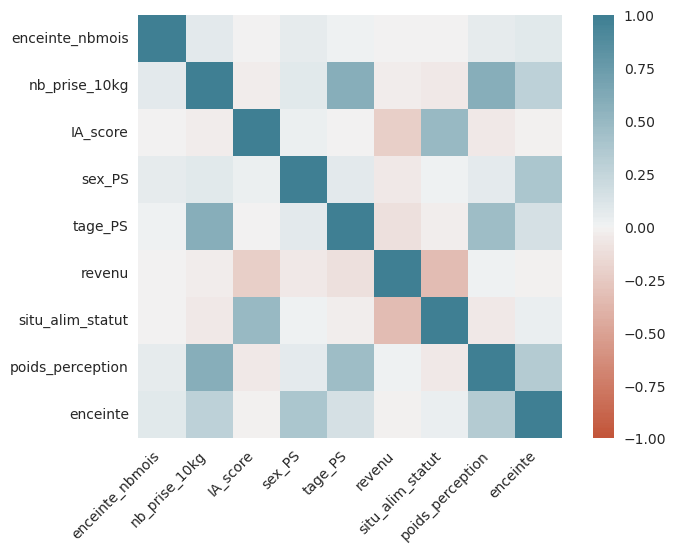

In [219]:
import seaborn as sns

corr = data_preprocessed.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe_lr = Pipeline([
    ('preprocessor', preprocessor_regression), # 1ère étape réaliser le preprocessing
    ('regression', LinearRegression()) # 2ème étape estime notre régression linéaire
])

In [221]:
lr = pipe_lr.fit(X_train_regression, y_train)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test_regression)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")

Le RMSE sur le jeu de test est : 4.3542
Le R2 sur le jeu de test est : 0.4517


In [223]:
print(f"La variance de l'IMC de jeu de test est : {round(y_test.var(), 4)}")
print(f"La moyenne de l'IMC de jeu de test est : {round(y_test.mean(), 4)}")
print(f"L'écart interquartile de l'IMC de jeu de test est : {round(y_test.quantile(0.75) - y_test.quantile(0.25), 4)}")

La variance de l'IMC de jeu de test est : 34.6071
La moyenne de l'IMC de jeu de test est : 22.3912
L'écart interquartile de l'IMC de jeu de test est : 8.1963


In [224]:
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Le RMSE sur le jeu de test équivaut à 12.58% de la variance de l'échantillon.


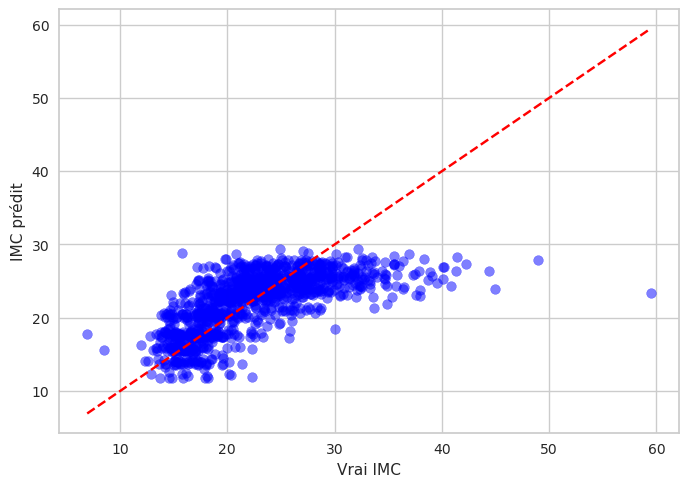

In [225]:
import matplotlib.pyplot as plt

# Creer le scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Ajout des labels
plt.xlabel('Vrai IMC')
plt.ylabel('IMC prédit')

# Ajout de la ligne à 45° comme référence
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Affichagedu graphique
plt.show()


In [226]:
NUMERICAL_0_IMPUT = [
    "enceinte_nbmois", "nb_prise_10kg", "nb_cigarettes_jour",  
    "nb_cigarettes_sem", "nb_cigares_jour", "nb_cigares_sem", 
    "nb_pipes_jour", "nb_pipes_sem", "allaite_nbsem", 
    "regime_nb_2dernann", "regime_nb_anter2dernann"
    ]

In [227]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer, StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, NUMERICAL_0_IMPUT),
        ("numerical_median", numerical_median, [x for x in NUMERICAL if x not in NUMERICAL_0_IMPUT]),
        ("categorical", categorical_encoder, CATEGORICAL)
    ]
)

In [228]:
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', RandomForestRegressor(random_state=SEED))
])

In [229]:
pipe_rfr['regression'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [230]:
param_grid = {
    "regression__n_estimators": [50, 100, 200],
    "regression__max_leaf_nodes": [5, 10, 50, None]
}

In [231]:
from sklearn.model_selection import GridSearchCV

pipe_gscv = GridSearchCV(pipe_rfr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

In [232]:
rfr = pipe_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [233]:
print(f"Meilleure combinaison retenue: {rfr.best_params_}")

Meilleure combinaison retenue: {'regression__max_leaf_nodes': None, 'regression__n_estimators': 200}


In [235]:
perf_random_forest = pd.DataFrame(rfr.cv_results_)
perf_random_forest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regression__max_leaf_nodes,param_regression__n_estimators,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.676782,0.124665,0.020520,0.005624,5,50,"{'regression__max_leaf_nodes': 5, 'regression_...",0.830922,0.813685,0.814525,0.830626,0.835006,0.824953,0.008995,11,0.830080,0.813672,0.814473,0.830611,0.834286,0.824625,0.008740,11,-2.334877,-2.447202,-2.499357,-2.305504,-2.350117,-2.387411,0.073439,11
1,1.183948,0.035991,0.024659,0.006064,5,100,"{'regression__max_leaf_nodes': 5, 'regression_...",0.832631,0.813311,0.814503,0.831878,0.833568,0.825178,0.009226,10,0.831867,0.813286,0.814448,0.831872,0.832893,0.824873,0.009002,10,-2.322569,-2.449737,-2.499524,-2.296907,-2.359978,-2.385743,0.076926,10
2,2.440650,0.175239,0.043202,0.005807,5,200,"{'regression__max_leaf_nodes': 5, 'regression_...",0.831560,0.813199,0.814714,0.831676,0.833385,0.824907,0.008977,12,0.830796,0.813177,0.814656,0.831671,0.832703,0.824601,0.008757,12,-2.329950,-2.450452,-2.498121,-2.298279,-2.361317,-2.387624,0.075044,12
3,0.776011,0.067834,0.020788,0.004832,10,50,"{'regression__max_leaf_nodes': 10, 'regression...",0.902528,0.906131,0.911838,0.909179,0.917677,0.909471,0.005146,9,0.902290,0.906100,0.911837,0.909149,0.917560,0.909387,0.005178,9,-1.770565,-1.737257,-1.722930,-1.688449,-1.657594,-1.715359,0.039104,9
4,1.581715,0.194541,0.036864,0.009835,10,100,"{'regression__max_leaf_nodes': 10, 'regression...",0.903210,0.907098,0.912057,0.910034,0.917034,0.909887,0.004651,7,0.902972,0.907063,0.912057,0.910002,0.916917,0.909802,0.004688,7,-1.764369,-1.728320,-1.720783,-1.680502,-1.664052,-1.711605,0.035711,7
5,3.025859,0.380577,0.040190,0.005566,10,200,"{'regression__max_leaf_nodes': 10, 'regression...",0.903110,0.907629,0.912263,0.909408,0.916431,0.909768,0.004464,8,0.902865,0.907601,0.912262,0.909375,0.916313,0.909683,0.004506,8,-1.765342,-1.723316,-1.718770,-1.686348,-1.670090,-1.712773,0.032957,8
6,1.289482,0.192693,0.030611,0.010208,50,50,"{'regression__max_leaf_nodes': 50, 'regression...",0.928669,0.931859,0.931260,0.932564,0.940399,0.932950,0.003950,5,0.928605,0.931841,0.931222,0.932514,0.940382,0.932913,0.003962,5,-1.513471,-1.480109,-1.521774,-1.455229,-1.409614,-1.476039,0.040877,5
7,3.100877,0.228613,0.037753,0.008516,50,100,"{'regression__max_leaf_nodes': 50, 'regression...",0.929238,0.932215,0.931440,0.931881,0.940165,0.932988,0.003736,4,0.929177,0.932186,0.931405,0.931818,0.940144,0.932946,0.003748,4,-1.507405,-1.476353,-1.519745,-1.462712,-1.412419,-1.475727,0.037733,4
8,5.062548,0.372529,0.045059,0.007497,50,200,"{'regression__max_leaf_nodes': 50, 'regression...",0.929428,0.931540,0.931709,0.932556,0.940244,0.933095,0.003720,3,0.929369,0.931515,0.931675,0.932495,0.940230,0.933057,0.003732,3,-1.505359,-1.483635,-1.516748,-1.455427,-1.411405,-1.474515,0.037856,3
9,3.198550,0.315285,0.041347,0.005100,None,50,"{'regression__max_leaf_nodes': None, 'regressi...",0.928948,0.933375,0.931344,0.929178,0.939237,0.932417,0.003771,6,0.928747,0.933333,0.931297,0.929093,0.939233,0.932340,0.003822,6,-1.511976,-1.463818,-1.520943,-1.491658,-1.423135,-1.482306,0.035507,6


In [236]:
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Le RMSE sur le jeu de test est : 1.606
Le R2 sur le jeu de test est : 0.9254
Le RMSE sur le jeu de test équivaut à 4.64% de la variance de l'échantillon.


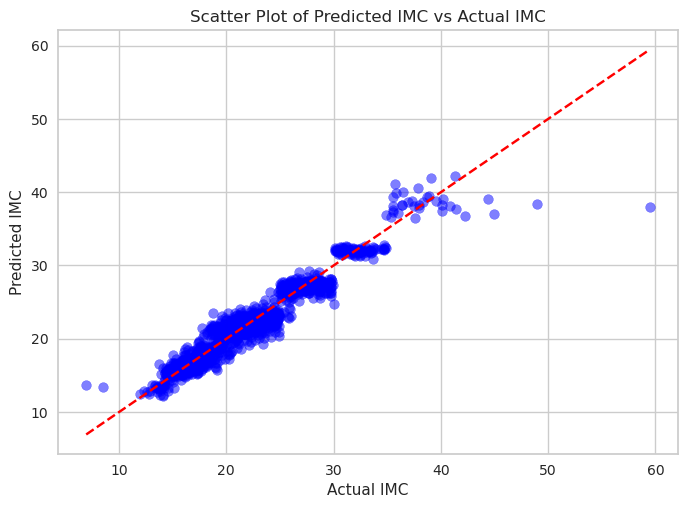

In [237]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()


In [238]:
from sklearn.neighbors import KNeighborsRegressor

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', KNeighborsRegressor())
])

param_grid = {
    "regression__n_neighbors": [3, 4, 5, 6],
    "regression__p": [1, 2, 3],
}

pipe_gscv = GridSearchCV(pipeline_knn, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
knn = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {knn.best_params_}")

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleure combinaison retenue: {'regression__n_neighbors': 6, 'regression__p': 2}
Le RMSE sur le jeu de test est : 3.4711
Le R2 sur le jeu de test est : 0.6516
Le RMSE sur le jeu de test équivaut à 10.03% de la variance de l'échantillon.
